In [3]:
###########################################
# setting1  undersampled all              #
#                                         #
# setting 2 undersampled training         #
###########################################
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import roc_curve
# Split dataset into training set and test set
import sklearn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Setting 1: No resample, just normalize the data

In [2]:
##############################################
#   setting1 undersampled over all data     #
#############################################
x_train_setting1=np.loadtxt("preprocessed/x_train.csv", delimiter=",")
y_train_setting1=np.loadtxt("preprocessed/y_train.csv", delimiter=",")
x_valid_setting1=np.loadtxt("preprocessed/x_valid.csv", delimiter=",")
y_valid_setting1=np.loadtxt("preprocessed/y_valid.csv", delimiter=",")
x_test_setting1=np.loadtxt("preprocessed/x_test.csv", delimiter=",")
y_test_setting1=np.loadtxt("preprocessed/y_test.csv", delimiter=",")

In [3]:
#############################check training, validation, and testing data size

In [4]:
size_feature = x_train_setting1.shape[1]
size_train = x_train_setting1.shape[0]
size_valid = x_valid_setting1.shape[0]
size_test = x_test_setting1.shape[0]

print(f'feature size: {size_feature} | train size: {size_train} | validation size: {size_valid} | test size: {size_test}')


feature size: 44 | train size: 76538 | validation size: 9567 | test size: 9568


# 1.1 SVM Model parameter selection

In [5]:
#############################support vector machine

In [6]:
def train_validation(x_train, y_train,x_valid,y_valid, config):
    mean_loss_valid = 0.0

    print("train_validation function starts here.") 
    #Train the model using training data
    clf = svm.SVC(C=config['reg_para'],kernel=config['kernel'])
    clf.fit(x_train, y_train)
    
    #calculating the training accurary score
    yhat_train = clf.predict(x_train)
    acurracy_train=metrics.accuracy_score(y_train, yhat_train)
    #calculating the validation accurary score
    yhat_valid = clf.predict(x_valid)
    acurracy_valid=metrics.accuracy_score(y_valid, yhat_valid)
    
    
    print(f'\r[Info] config: {config} | training accuracy: {acurracy_train} | validation accuracy: {acurracy_valid}', end='')
    print('\n[Info] Done')
    return acurracy_train,acurracy_valid

In [7]:
config = dict(
    kernel = 'linear',
    reg_para = 1,

)

In [ ]:
##There is no need to run this cell. Just for debugging purpose.

#acurracy_train,acurracy_valid=train_validation(x_train_setting1, y_train_setting1,x_valid_setting1,y_valid_setting1, config)

train_validation function starts here.


### 1.1.1 Impact of Different kernel functions and regularization parameters under setting 1

In [18]:
##Run the model using different kernels and reg_para's setting
#use mean_loss_valid as metric to design which setting is best
#
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
reg_para_list=[0.6,0.8,1.0,1.2,1.4]
acurracy_train_matrix=np.zeros((len(kernel_list),len(reg_para_list)))
acurracy_valid_matrix=np.zeros((len(kernel_list),len(reg_para_list)))

for i,k in enumerate(kernel_list):
    for j,a in enumerate(reg_para_list):
        #print(config)
        config['kernel']=k
        config['reg_para']=a
        acurracy_train_matrix[i][j],acurracy_valid_matrix[i][j]=train_validation(x_train_setting1, y_train_setting1,x_valid_setting1,y_valid_setting1, config)
        

train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 0.6} | training accuracy: 0.5885688364708551 | validation accuracy: 0.600453514739229
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 0.8} | training accuracy: 0.5885688364708551 | validation accuracy: 0.600453514739229
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 1.0} | training accuracy: 0.5886255386709004 | validation accuracy: 0.600453514739229
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 1.2} | training accuracy: 0.5887389430709912 | validation accuracy: 0.600453514739229
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 1.4} | training accuracy: 0.5886255386709004 | validation accuracy: 0.600453514739229
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'poly', 'r

### 1.1.2 Plot the heatmap of validation accuracy

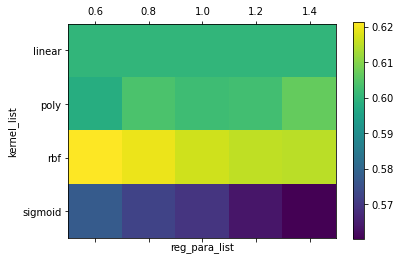

In [19]:
figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
caxes = axes.matshow(acurracy_valid_matrix, interpolation ='nearest')
figure.colorbar(caxes)
 
axes.set_xticklabels(['']+reg_para_list)
axes.set_yticklabels(['']+kernel_list)
axes.set_xlabel("reg_para_list")
axes.set_ylabel("kernel_list")
 
plt.show()

From the heatmap above, we know valiadation accuracy is **highest (0.621)** under the **'rbf' kernel** and the regularization parameter is **0.6**.

## 1.2 Train the model using the best set of parameters

In [5]:
def test_validation(x_train, y_train,x_test,y_test, config):
    

    print("test_validation function starts here.") 
    #Train the model using training data
    clf = svm.SVC(C=config['reg_para'],kernel=config['kernel'])
    clf.fit(x_train, y_train)
    
    #calculating the training accurary score
    yhat_train = clf.predict(x_train)
    acurracy_train=metrics.accuracy_score(y_train, yhat_train)
    #calculating the validation accurary score
    yhat_test = clf.predict(x_test)
    acurracy_test=metrics.accuracy_score(y_test, yhat_test)
    

    
    print(f'\r[Info] config: {config} | training accuracy: {acurracy_train} | testing accuracy: {acurracy_test}', end='')
    #Print out the classification report
    print("\n","classification report:",metrics.classification_report(y_test, yhat_test))
    print("confusion matrix:",confusion_matrix(y_test, yhat_test))
    roc_auc=roc_auc_score(y_test,yhat_test,average=None)
    print("ROC_AUC_score",roc_auc)
    print('\n[Info] Done')

    ####Plot the heatmap
    plt.figure(figsize=(9,9))
    sns.heatmap(confusion_matrix(y_test, yhat_test), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(acurracy_test)
    plt.title(all_sample_title, size = 15)
    
    
    return yhat_test,acurracy_test,roc_auc

In [6]:
#Best configuration based on the result above
best_config = dict(
    kernel = 'rbf',
    reg_para = 0.6,

)

In [ ]:
#Train the support vector machine model using the best_config
#yhat_test,acurracy_test,roc_auc=test_validation(x_train_setting1, y_train_setting1,x_test_setting1,y_test_setting1, best_config)


test_validation function starts here.


In [16]:
#####################################################################################################
#Run 5 times and calculate the avg testing acurracy (acurracy_test) and avg roc_auc score (roc_auc)
####################################################################################################
acurracy_test_list=np.zeros(5)
roc_auc_list=np.zeros(5)
for i in range(0,5):
    yhat_test,acurracy_test_list[i],roc_auc_list[i]=test_validation(x_train_setting1, y_train_setting1,x_test_setting1,y_test_setting1, best_config)
    print(f'\n[Info] number of iter: {i} | testing accuracy: {acurracy_test_list[i]} | roc_auc score: {roc_auc_list[i]}', end='')



print("mean of testing accuracy",np.mean(acurracy_test_list),"mean of roc_auc score",np.mean(roc_auc_list))


[Info] number of iter: 0 | testing accuracy: 0.0 | roc_auc score: 0.0
[Info] number of iter: 1 | testing accuracy: 0.5 | roc_auc score: 0.5
[Info] number of iter: 2 | testing accuracy: 2.0 | roc_auc score: 2.0
[Info] number of iter: 3 | testing accuracy: 4.5 | roc_auc score: 4.5
[Info] number of iter: 4 | testing accuracy: 8.0 | roc_auc score: 8.0

<ipython-input-37-ae9a3815c563>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0, 0.5, 'True Positive Rate')

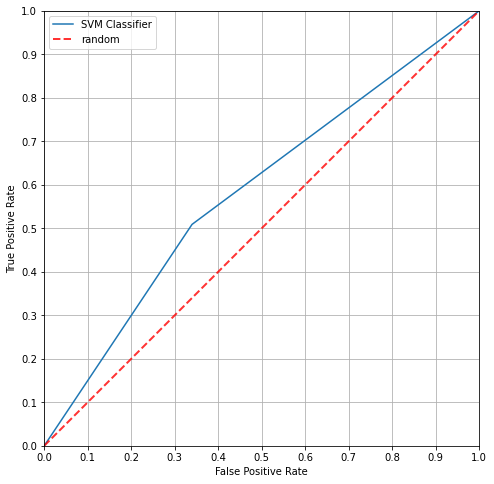

In [37]:
##############
# ROC Curve #
#############
fpr, tpr, thresholds=roc_curve(y_test_setting1, yhat_test)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='SVM Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 2. Setting 2: undersampled over training data

In [39]:
###########################################################
#    undersampled setting 2, undersample training only    #
###########################################################
x_train_undersampled = np.loadtxt("preprocessed/x_train_resampled.csv", delimiter=',')
y_train_undersampled = np.loadtxt("preprocessed/y_train_resampled.csv", delimiter=',')
x_valid=np.loadtxt("preprocessed/x_valid.csv",delimiter=",")
y_valid=np.loadtxt("preprocessed/y_valid.csv",delimiter=",")
x_test=np.loadtxt("preprocessed/x_test.csv",delimiter=",")
y_test=np.loadtxt("preprocessed/y_test.csv",delimiter=",")

In [40]:
size_feature = x_train_undersampled.shape[1]
size_train = x_train_undersampled.shape[0]
size_valid = x_valid.shape[0]
size_test = x_test.shape[0]

print(f'feature size: {size_feature} | train size: {size_train} | validation size: {size_valid} | test size: {size_test}')


feature size: 44 | train size: 17624 | validation size: 9567 | test size: 9568


### 2.1 Parameter selection

In [43]:
##Run the model using different kernels and reg_para's setting
#use mean_loss_valid as metric to design which setting is best
#
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
reg_para_list=[0.6,0.8,1.0,1.2,1.4]
acurracy_train_matrix_2=np.zeros((len(kernel_list),len(reg_para_list)))
acurracy_valid_matrix_2=np.zeros((len(kernel_list),len(reg_para_list)))

for i,k in enumerate(kernel_list):
    for j,a in enumerate(reg_para_list):
        #print(config)
        config['kernel']=k
        config['reg_para']=a
        #print(config)
        acurracy_train_matrix_2[i][j],acurracy_valid_matrix_2[i][j]=train_validation(x_train_undersampled, y_train_undersampled,x_valid,y_valid, config)
        

train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 0.6} | training accuracy: 0.5899909214707217 | validation accuracy: 0.11257447475697711
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 0.8} | training accuracy: 0.5899909214707217 | validation accuracy: 0.11257447475697711
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 1.0} | training accuracy: 0.5901044030867 | validation accuracy: 0.11257447475697711
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 1.2} | training accuracy: 0.5900476622787109 | validation accuracy: 0.11257447475697711
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'linear', 'reg_para': 1.4} | training accuracy: 0.5899341806627326 | validation accuracy: 0.11257447475697711
[Info] Done
train_validation function starts here.
[Info] config: {'kernel': 'po

### Plot the heatmap of validation accuracy

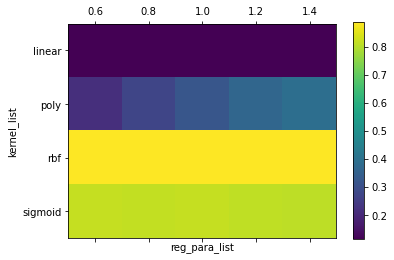

In [45]:
figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
caxes = axes.matshow(acurracy_valid_matrix_2, interpolation ='nearest')
figure.colorbar(caxes)
 
axes.set_xticklabels(['']+reg_para_list)
axes.set_yticklabels(['']+kernel_list)
axes.set_xlabel("reg_para_list")
axes.set_ylabel("kernel_list")
 
plt.show()

From the heatmap above, we know valiadation accuracy is **highest (0.8876345771924323)** under the **'rbf' kernel** no matter what the regularization parameters are - different regularization parameters can lead to the same validation accuracy.

In [46]:
#Best configuration based on the result above
#We just use reg_para =1.0
best_config_2 = dict(
    kernel = 'rbf',
    reg_para = 1.0,

)

In [ ]:
acurracy_test_list=np.zeros(5)
roc_auc_list=np.zeros(5)
for i in range(0,5):
    yhat_test_2,acurracy_test_list[i],roc_auc_list[i]=test_validation(x_train_undersampled, y_train_undersampled,x_test,y_test, best_config_2)
    print(f'\n[Info] number of iter: {i} | testing accuracy: {acurracy_test_list[i]} | roc_auc score: {roc_auc_list[i]}', end='')


    

print("mean of testing accuracy",np.mean(acurracy_test_list),"mean of roc_auc score",np.mean(roc_auc_list))

test_validation function starts here.
[Info] config: {'kernel': 'rbf', 'reg_para': 1.0} | training accuracy: 0.6693713118474807 | validation accuracy: 0.6393185618729097classification report:               precision    recall  f1-score   support

         0.0       0.92      0.65      0.76      8432
         1.0       0.18      0.56      0.27      1136

    accuracy                           0.64      9568
   macro avg       0.55      0.61      0.52      9568
weighted avg       0.83      0.64      0.70      9568

confusion matrix: [[5480 2952]
 [ 499  637]]
ROC_AUC_score 0.6053222799796883

[Info] Done


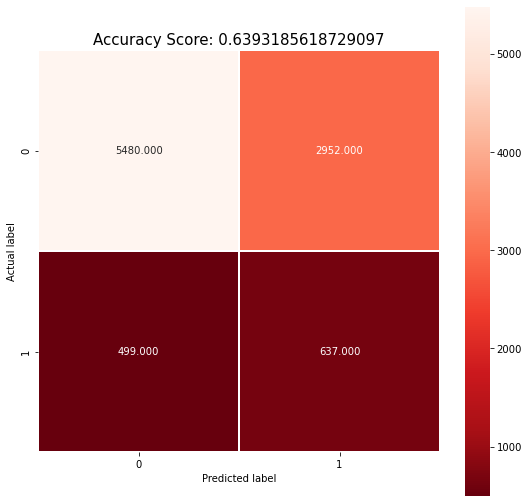

In [47]:
#Train the support vector machine model using the best_config
#yhat_train_2, yhat_test_2=test_validation(x_train_undersampled, y_train_undersampled,x_test,y_test, best_config_2)


<ipython-input-48-c5d10520d5d6>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0, 0.5, 'True Positive Rate')

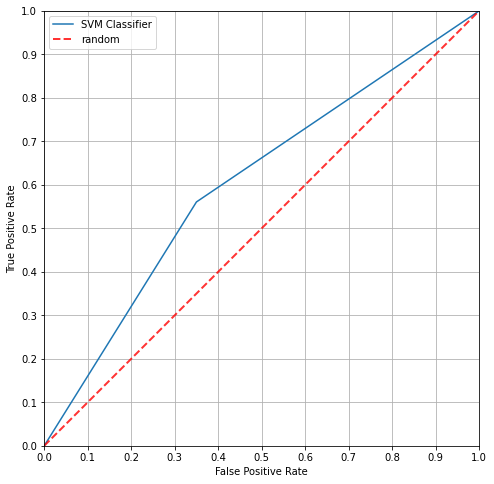

In [48]:
##############
# ROC Curve #
#############
fpr, tpr, thresholds=roc_curve(y_test, yhat_test_2)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='SVM Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')